#  <center><span style="background-color: #FFFF00">Systematic Reviews - Primary Screening</span></center>

In [2]:
# Staples
import string
import numpy as np
import pandas as pd
import csv
import scipy
from array import array
import random

# Deep learning libraries
# Keras and tensorflow
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, Input
from keras.layers import LSTM, CuDNNLSTM, Embedding, Bidirectional
from keras.layers import Flatten, Dense, TimeDistributed, Dropout,concatenate, Activation, Concatenate
from keras.layers import SpatialDropout1D, GlobalMaxPooling1D, Conv1D, MaxPooling1D, AveragePooling1D
from keras_contrib.layers import CRF
from keras.initializers import RandomUniform
from keras.utils import to_categorical, plot_model
from keras.engine.input_layer import Input
from keras.regularizers import l1, l2
from keras.layers import *

# GPU configuration
from keras.backend.tensorflow_backend import set_session
import keras
configtf = tf.ConfigProto()
configtf.gpu_options.allow_growth = True
configtf.gpu_options.visible_device_list = "3"
set_session(tf.Session(config=configtf))

# Alternative
#import os
#os.environ["CUDA_VISIBLE_DEVICES"]="3"


## Plotly and other visualization libraries
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import seaborn

from sklearn.manifold import TSNE

# word-embedding libraries
import gensim
from gensim.models import Word2Vec
from word2vec import word2phrase
from gensim.models import FastText
import fasttext


# Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
#nltk.download()
from nltk import ngrams, pos_tag

# Language related libraries
from langdetect import detect


# Classical sklearn
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import scale, StandardScaler, Normalizer, label_binarize
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_recall_curve, accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.metrics.scorer import make_scorer


# Libraries for imbalanced data
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SMOTENC, SVMSMOTE
from imblearn.keras import BalancedBatchGenerator


# Hyper-parameter optimization
from hyperopt import hp, tpe
import optuna
from hypopt import GridSearch


# Web processing 
import requests
import lxml.html as lh

/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/anja

/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.

/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [3]:
from keras.wrappers.scikit_learn import KerasClassifier
from numpy.random import choice
from sklearn.model_selection import PredefinedSplit

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

import numpy as np

print("TensorFlow version: ", tf.__version__)

logdir = "/home/anjani/AutomatingSystematicReviews/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

TensorFlow version:  1.13.1


# PubMed: Physiotherapy and Rehabilitation

In [5]:
years = []
counts = []

with open('timeline.csv') as pubPRfile:
    for line in pubPRfile:
        year = line.split(',')[0]
        years.append(year)
        count = line.split(',')[1]
        counts.append(count)

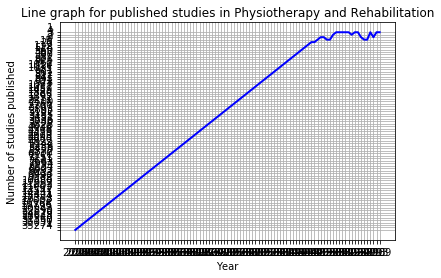

In [6]:
import matplotlib.pyplot as plt
lines = plt.plot(years, counts)
plt.setp(lines, color='b', linewidth=2.0)
plt.title('Line graph for published studies in Physiotherapy and Rehabilitation')
plt.xlabel('Year')
plt.ylabel('Number of studies published')
plt.grid(True)
plt.show()

In [7]:
# Initialize tokenizers and lemmatizer
lemmatizer = WordNetLemmatizer()

# Fetch and define stop words

In [8]:
# Define stop words

# Get stopwords defined by PubMed
def getPubStopWords():
    pubmed_stopwords = set()

    url='https://www.ncbi.nlm.nih.gov/books/NBK3827/table/pubmedhelp.T.stopwords/'

    #Create a handle, page, to handle the contents of the website
    page = requests.get(url)
    #Store the contents of the website under doc
    doc = lh.fromstring(page.content)
    #Parse data that are stored between <tr>..</tr> of HTML
    tr_elements = doc.xpath('//tr')

   
    for t in range(1, len(tr_elements)):
        for eachRow in tr_elements[t]:
        
            content = eachRow.text_content()
            if len(content) > 1:
                indStop = str(content).split(',')
                for stop in indStop:
                    pubmed_stopwords.add(stop.replace(' ', ''))
                    
    return pubmed_stopwords

pubmedStop_words = getPubStopWords()

for pubWords in pubmedStop_words:
    stop_words.add(pubWords)

# additional corpus-specific stopwords
stopfile = 'stopwords.txt'
addStopWords = []
with open(stopfile, 'r') as stopFile:
    for line in stopFile:
        addStopWords.append(line.strip())


for addStopWord in addStopWords:
    stop_words.add(addStopWord)

In [8]:
print('Total number of stop words: ', len(stop_words))

Total number of stop words:  306


## Staple functions 

In [6]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

In [7]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [8]:
def textTokenizer(s):
    s = s.lower()
    s = s.replace('p=', '')
    s = s.replace('tumour', 'tumor').replace('leukaemia', 'leukemia').replace('coeliac', 'celiac')
    s = s.replace('oesophagus', 'esophagus').replace('oestrogen', 'estrogen').replace('paediatric', 'pediatric')
    s = s.replace('orthopaedic', 'orthopedic').replace('ischaemic', 'ischemic').replace('haemaglioblastoma', 'hemaglioblastoma')
    #tokenizer = RegexpTokenizer(r'[a-zA-Z\s]+')
    #tokens = tokenizer.tokenize(s)
    tokens = word_tokenize(s)    
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [t for t in tokens if t.isdigit() == False]
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [lemmatizer.lemmatize(t) for t in tokens] # change this to biolemmatizer
    return tokens

## Word Embeddings (fastText)

In [9]:
#allCorpusFile = 'publication-titles-abstracts_preprocessed.txt'
#allCorpusPhrased = 'publication-titles-abstracts_lowercased_phrased.txt'

# word2phrase(allCorpusFile, allCorpusPhrased, min_count=6, threshold=100, debug=2, verbose=False)


#sentences = []
#with open(allCorpusPhrased, encoding = 'latin-1') as corpusFile:
#    for line in corpusFile:        
#        tokens = line.split()
#        sentences.append(tokens)
        
        
#pubmed_fT_embedng = FastText(sentences, sg=1, hs=0, size=300, alpha=0.05, window=5, min_n=3, max_n=6, min_count=5, max_vocab_size=None, word_ngrams=1, sample=0.0001, seed=1, min_alpha=0.0001, negative=5, iter=5, null_word=0, sorted_vocab=1, bucket=2000000, trim_rule=None)

#pubmed_fT_embedng.save("PMCOA_TA_fT_300_wv.bin")

In [11]:
pubmed_fT_embedng = FastText.load("PMCOA_TA_fT_300_wv.bin")

## Word Embeddings (word2vec)

In [ ]:
#pubmed_w2v_embedng = Word2Vec(sentences, sg=1, hs=0, size=300, alpha=0.05, window=5, min_count=5, max_vocab_size=None, sample=0.0001, seed=1, min_alpha=0.0001, negative=5, iter=5, null_word=0, sorted_vocab=1, trim_rule=None)

#pubmed_w2v_embedng.save("PMCOA_TA_w2v_300_wv.bin")

In [10]:
Y_trainpubmed_w2v_embedng = Word2Vec.load("PMCOA_TA_w2v_300_wv.bin")

# Fetch and process data

In [15]:
pmcid = []
corpus = []
corpus_tokens = []
category = []
mesh = []

vocabulary = dict()

with open(r'/mnt/nas2/data/systematicReview/inputData/citation_screening_deduplicated_corpus.csv', 'r', encoding= 'utf-8') as corpuslabeled:
    csv_reader = csv.reader(corpuslabeled, delimiter='\t')
    temp = 0
    for row in csv_reader:
        
        pid = row[1]
               
        # Tokenize titles and abstracts
        titleAbstract = row[0] + ' ' + row[2]
        titleAbstract_tokens = textTokenizer(titleAbstract)
        
        # generate the vocabulary
        for t in titleAbstract_tokens:
            if t not in vocabulary:
                vocabulary[t] = 1
            elif t in vocabulary:
                vocabulary[t] = vocabulary[t] + 1
        
        if 'include' in row[3]:
            cat = 1
        else:
            cat = 0
        mesh.append(row[4])
        
        pmcid.append(pid)
        corpus.append(' '.join(titleAbstract_tokens))
        corpus_tokens.append(titleAbstract_tokens)
        category.append(cat)

In [16]:
print("Size of vocabulary after primary pre-processing: ", len(vocabulary))

Size of vocabulary after primary pre-processing:  130151


In [17]:
# Remove tokens that do not appear more than 5 times in the entire corpus
corpus_fr = []
corpus_tokens_fr = []

vocabulary_fr = dict()

for i in corpus:
    tokens = i.split(' ')
    corpus_i = []
        
    for t in tokens:
        if vocabulary[t] > 5:
            
            if t not in vocabulary_fr:
                vocabulary_fr[t] = 1
            elif t in vocabulary_fr:
                vocabulary_fr[t] = vocabulary_fr[t] + 1
            
            corpus_i.append(t)
    corpus_fr.append(' '.join(corpus_i))
    
for i in corpus_tokens:
    corpus_i = []
    for t in i:
        if vocabulary[t] > 5:
            corpus_i.append(t)
    corpus_tokens_fr.append(corpus_i)

In [18]:
print("Size of vocabulary after removing low frequency tokens: ", len(vocabulary_fr))

Size of vocabulary after removing low frequency tokens:  24237


## Add most frequent "bigram" 

In [19]:
# update the unigram feature reduced vocabulary with bigrams and their counts

corpus_fr_bigramed_tokenized = [] # Includes complete sentences of the document
corpus_fr_bigramed_tokens = [] # Includes just the tokens of the sentences of the document

for eachCorpusInstance in corpus_fr:
    
    bigram = list(ngrams(eachCorpusInstance.split(),2))
    for eachBigram in bigram:
        
        eachBigram = eachBigram[0] + '_' + eachBigram[1]
        
        if eachBigram not in vocabulary_fr:
            vocabulary_fr[eachBigram] = 1
        if eachBigram in vocabulary_fr:
            vocabulary_fr[eachBigram] = vocabulary_fr[eachBigram] + 1
            
            
        eachTraininstanceListed = eachCorpusInstance.split(' ')
        eachTraininstanceListed.append(eachBigram)
    
    corpus_fr_bigramed_tokenized.append(' '.join(eachTraininstanceListed))
    corpus_fr_bigramed_tokens.append(eachTraininstanceListed)

In [20]:
print("Size of the vocabulary after addition of the bigrams: ", len(vocabulary_fr))

Size of the vocabulary after addition of the bigrams:  1302133


In [21]:
# remove the less frequent bigrams
vocab_bigram_fr = dict() # Includes vocabulary with feature reduced bigrams 

corpus_bigramed_tokenized_fr = []
corpus_bigramed_tokens_fr = []

for eachBiCorpInstance in corpus_fr_bigramed_tokenized:
    
    tokens = eachBiCorpInstance.split(' ')
    
    featureReducedBigrams = []
    
    for t in tokens:
        if vocabulary_fr[t] > 5:
            featureReducedBigrams.append(t)
            
            if t not in vocab_bigram_fr:
                vocab_bigram_fr[t] = 1
            elif t in vocab_bigram_fr:
                vocab_bigram_fr[t] = vocab_bigram_fr[t] + 1
            
            
    # Add to a larger list
    corpus_bigramed_tokenized_fr.append(' '.join(featureReducedBigrams))
    corpus_bigramed_tokens_fr.append(featureReducedBigrams)

In [22]:
print("Size of the vocabulary after feature reduction from the bigrams: ", len(vocab_bigram_fr))

Size of the vocabulary after feature reduction from the bigrams:  31816


In [23]:
# pmcid , corpus_fr , corpus_tokens_fr , category , mesh

data_df = pd.DataFrame(
    {'pmcid': pmcid,
     'texts': corpus_bigramed_tokenized_fr,
     'tokens': corpus_bigramed_tokens_fr,
     'category': category,
     'mesh': mesh
    })

In [24]:
# shuffle the dataframe
df_data = data_df.sample(frac=1).reset_index()

In [25]:
counter_j = 0
for key, value in vocab_bigram_fr.items():
    if '_' in key and vocab_bigram_fr[key] > 100:
        print(key)
        counter_j = counter_j + 1
        #if counter_j == 40:
        #    break

clinical_oncology
quality_life
cancer_society
relief_committee
cancer_survivor
cancer_patient
clinical_trial
breast_cancer
cancer_treatment
relationship_disclose


## Class imbalance

In [26]:
print("Total number of samples for the \"Exclude\" class: ", category.count(0))
print("Total number of samples for the \"Include\" class: ", category.count(1))
print("The \"inclusion\" ratio for this Systematic Review topic is: ", (2259 / 23281) * 100, '%')

Total number of samples for the "Exclude" class:  23281
Total number of samples for the "Include" class:  2259
The "inclusion" ratio for this Systematic Review topic is:  9.703191443666508 %


In [27]:
# Class weights
weights_class = compute_class_weight('balanced', np.unique(category), category)
print(weights_class)

[0.54851596 5.65294378]


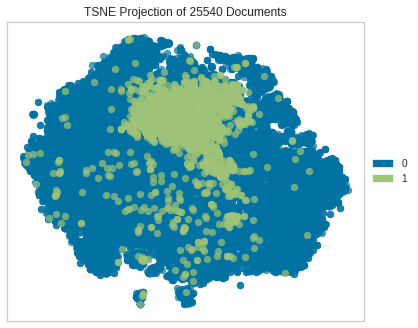

In [32]:
# Proof of class imbalance (and class overlap)
from yellowbrick.text import TSNEVisualizer
embeddingsClassOverlap = get_word2vec_embeddings(pubmed_w2v_embedng, df_data)
# show class imbalance with a figure
tsne = TSNEVisualizer()
tsne.fit(embeddingsClassOverlap, df_data['category'])
tsne.poof()

In [30]:
lengths = []

for each in df_data['texts']:
    lengths.append(len(each))
    
maximum_length = max(lengths)

print('Longest sequence has the length: ', maximum_length)

Longest sequence has the length:  8906


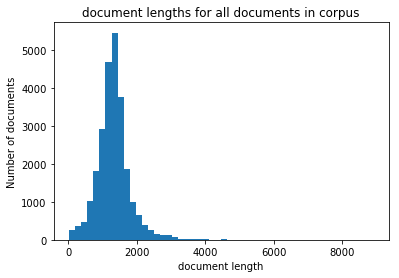

In [31]:
# fixed bin size
plt.hist(lengths, bins=50)
plt.title('document lengths for all documents in corpus')
plt.xlabel('document length')
plt.ylabel('Number of documents')
plt.show()

## Tackling class imbalance
<br>
More data > undersampling of majority class
<br>
Less data > oversampling of minority class
<br>
Preferred = Oversampling
<br>
Methods of oversampling 
<br>
1. Random oversampling
<br>
2. SMOTE: Types of SMOTE
<br>
3. Random oversampling with manual text augmentation using word embeddings
<br>

In [28]:
# load all the oversamplers

# Random oversampler
ros = RandomOverSampler(random_state=42)

# SMOTE oversamplers
smoteSampler = SMOTE(random_state=42)
border_smote = BorderlineSMOTE(random_state=42)
svm_smote = SVMSMOTE(random_state=42)

# Adasyn oversampler
adasyn = ADASYN(random_state=42)

## Experiments

## CNN - oversampling

In [29]:
# Experiment parameters
cv_times = 3  # 3-fold cross-validation

In [30]:
# Geenerate embedding matrix (word2vec)

embeddings_index = dict()
for idx, key in enumerate(pubmed_w2v_embedng.wv.vocab):
    embeddings_index[key] = pubmed_w2v_embedng.wv[key]
    
print('Loaded %s word vectors.' % len(embeddings_index))

# create a static weight matrix for words in training docs 
embedding_matrix = np.zeros((len(vocab_bigram_fr), 300))

counter = 0
for word, i in vocab_bigram_fr.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[counter] = embedding_vector
    counter = counter + 1

Loaded 690756 word vectors.


In [31]:
# Parameters for the embedding layer
max_length = 4000

vocab_size = len(vocab_bigram_fr)
print('Vocabulary has ', vocab_size, ' number of words')

Vocabulary has  31816  number of words


In [32]:
def oversampling(X_train, X_test, X_eval, y_train, y_test, y_eval):
    # perform oversampling operation here
    
    X_listed = []
    for eachString in X_train:
        X_listed.append([eachString])

    X_test_listed = []
    for eachString in X_test:
        X_test_listed.append([eachString])
        
    X_eval_listed = []
    for eachString in X_eval:
        X_eval_listed.append([eachString])
        
    # Random oversample here
    X_tr_resampled, y_tr_resampled = ros.fit_sample(X_listed, y_train) # resampled training set
    X_te_resampled, y_te_resampled = ros.fit_sample(X_test_listed, y_test) # resampled test set
    X_ev_resampled, y_ev_resampled = ros.fit_sample(X_eval_listed, y_eval) # resampled hold-out test set (or eval)
    
    
    X_tr_resampled_ = []
    for eachTextChunk in X_tr_resampled:
        tokens = eachTextChunk[0]
        X_tr_resampled_.append(tokens)
        
    X_te_resampled_ = []
    for eachTextChunk in X_te_resampled:
        tokens = eachTextChunk[0]
        X_te_resampled_.append(tokens)
        
        
    X_ev_resampled_ = []
    for eachTextChunk in X_ev_resampled:
        tokens = eachTextChunk[0]
        X_ev_resampled_.append(tokens)
        
        
    df_train = percentile_list = pd.DataFrame( {'X_train': X_tr_resampled_, 'y_train': y_tr_resampled})
    #train_df = df_train.sample(frac=1)
    
    df_test = percentile_list = pd.DataFrame( {'X_test': X_te_resampled_, 'y_test': y_te_resampled})
    #test_df = df_test.sample(frac=1)
    
    df_eval = percentile_list = pd.DataFrame( {'X_eval': X_ev_resampled_, 'y_eval': y_ev_resampled})
    #eval_df = df_eval.sample(frac=1)
    
    return df_train['X_train'], df_test['X_test'], df_eval['X_eval'], df_train['y_train'], df_test['y_test'], df_eval['y_eval']

In [33]:
def getTestFold(X_train_j, y_train_j, X_eval_j, y_eval_j):
    
    # The indices which have the value -1 will be kept in train.
    train_indices = np.full((len(X_train_j),), -1, dtype=int)

    # The indices which have zero or positive values, will be kept in test
    test_indices = np.full((len(X_eval_j),), 0, dtype=int)

    test_fold = np.append(train_indices, test_indices)
    
    return test_fold

In [34]:
def concatSeries(X_train_ros, y_train_ros, X_eval_ros, y_eval_ros):
    
    X_train = list(X_train_ros)
    y_train = list(y_train_ros)
    X_eval = list(X_eval_ros)
    y_eval = list(y_eval_ros)
    
    X_main = []
    for eachTrain in X_train:
        X_main.append(eachTrain)
        
    for eachEval in X_eval:
        X_main.append(eachEval)
    
    
    Y_main = []
    for eachTrain in y_train:
        Y_main.append(eachTrain)
        
    for eachEval in y_eval:
        Y_main.append(eachEval)    
    
    df_train = pd.DataFrame({'tokens': X_main , 'category': Y_main})
    
    return df_train  

In [69]:
def prec_rec_score(y_true, y_predicted):
    aucScr = 0.0
    # calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_true, y_predicted)
        
    # calculate precision-recall AUC
    aucScr = auc(recall, precision)    

    return aucScr

myScorer = make_scorer(prec_rec_score, greater_is_better=True)

def create_CNN_Zhang(dense_layer_sizes = 10, epochs = 10, filters = 100):
    
    submodels = []
    
    main_input = Input(shape=(max_length,), name='main_input')
    
    for kw in (2, 2, 2):
        embedding = Embedding(vocab_size, 300, input_length=4000, weights=[embedding_matrix], trainable=False)(main_input)
        convolution = Conv1D(filters = 100, kernel_size=kw, activation='relu')(embedding)
        max_pool= MaxPooling1D(pool_size=2)(convolution)
        flattened = Flatten()(max_pool)
        submodels.append(flattened)
    
    mergedOut = add([submodels[0], submodels[1], submodels[2]])
    dense1 = Dense(dense_layer_sizes, activation='relu', kernel_regularizer=l2(3), bias_regularizer=l2(3))(mergedOut)
    dropout = Dropout(0.5)(dense1)
    dense2_out = Dense(1, activation='sigmoid')(dropout)
    
    newModel = Model(main_input, dense2_out)
    
    newModel.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['mae'])
    
    plot_model(newModel, to_file='model_1.png')
    
    return newModel

def create_CNN(dense_layer_sizes = 10, epochs = 10, filters = 100, kernel_size = 2, dropout_rate=0.5, optimizers = 'sgd'):
    
    model = Sequential()
    model.add(Embedding(vocab_size, 300, input_length=max_length, weights=[embedding_matrix_fT], trainable=False))
    model.add(Conv1D(filters= filters, kernel_size= kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense_layer_sizes, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #print(model.summary())
    
    
    # compile network
    model.compile(loss='binary_crossentropy', optimizer=optimizers, metrics=['mae'])

    return model

In [72]:
# mean fit for classical machine learning classifiers after random oversampling

train_roc_auc = []
test_roc_auc = []

precision_include = []
recall_include = []
f1_include = []

precision_exclude = []
recall_exclude = []
f1_exclude = []


def meanFit(cv_):
    
    for cv_i in range(0, cv_):
        print('Iteration number: ', cv_i)
        
        # Shuffle before first split
        df_data_i = df_data.sample(frac=1).reset_index()
        
        # Train test split before random oversampling
        X_train_i, X_test, y_train_i, y_test = train_test_split(df_data_i['texts'], df_data_i['category'], test_size=0.20, random_state=42)

        # Split the training set for into GridSearch training and test set to identify best hyperparameters
        X_train, X_eval, y_train, y_eval = train_test_split(X_train_i, y_train_i, test_size=0.20, random_state=42)
        
        # Random over sampling (Train, Test and validation splits)
        X_train_ros, X_test_ros, X_eval_ros, y_train_ros, y_test_ros, y_eval_ros = oversampling(X_train, X_test, X_eval, y_train, y_test, y_eval)

        # Get the test fold from above split
        testFold = getTestFold(X_train_ros, y_train_ros, X_eval_ros, y_eval_ros)
        ps = PredefinedSplit(testFold)
        
        df_train = concatSeries(X_train_ros, y_train_ros, X_eval_ros, y_eval_ros)
        
        #Encode and pad training set 
        encoded_train = [one_hot(d, vocab_size) for d in df_train['tokens']]
        X_train_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post')
        
        # fit network
        # training set names: X_train_padded, y_train_main
        # test set names: X_test_padded, y_test_ros
        model = create_CNN()
        
        cnn_model = KerasClassifier(build_fn=create_CNN, verbose=2)
        
        
        #dense_size_candidates = [10, 30, 50, 70]
        #validator = GridSearchCV(cnn_model,
        #                 param_grid={'dense_layer_sizes': dense_size_candidates,
        #                             'epochs': [10],
        #                             'kernel_size': [2, 4, 5],
        #                             'filters': [4, 5, 6, 7, 8]},
        #                 scoring=myScorer, cv = ps,
        #                 n_jobs=1)
        
        sgd_opt = keras.optimizers.SGD(lr= 0.01)
        adagrad_opt = keras.optimizers.Adagrad(lr=0.01)
        rmsprop_opt = keras.optimizers.RMSprop(lr=0.001)
        adadel_opt = keras.optimizers.Adadelta(lr=1.0)
        adam_opt = keras.optimizers.Adam(lr=0.001)
        adamax_opt = keras.optimizers.Adamax(lr=0.002)
        
        validator = GridSearchCV(cnn_model,
                         param_grid={'dense_layer_sizes': [10],
                                     'epochs': [10],
                                     'kernel_size': [3],
                                     'filters': [6],
                                     'dropout_rate': [0.25, 0.5],
                                     'optimizers': ['sgd']},
                         scoring=myScorer, cv = ps,
                         n_jobs=1)
        
        grid_result = validator.fit(X_train_padded, df_train['category'], batch_size=50, callbacks=[tensorboard_callback])
        
        # summarize results
        print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
        train_roc_auc.append(grid_result.best_score_)
        
        
        means = grid_result.cv_results_['mean_test_score']
        params = grid_result.cv_results_['params']
        for mean, param in zip(means, params):
            print("Mean Precision Recall Curve score: %f with: %r" % (mean, param))
            
            
        # Final evaluation on the test set        
        encoded_test = [one_hot(d, vocab_size) for d in X_test_ros]
        X_test_padded = pad_sequences(encoded_test, maxlen=max_length, padding='post')
        
        y_pred = validator.best_estimator_.predict_proba(X_test_padded)
        
        y_pred_1 = []
        for eachY in y_pred:
            y_pred_1.append(eachY[1])
            
        prAUC_score = prec_rec_score(y_test_ros, y_pred_1)
        print('The Precision Recall Curve score for the test set is: ', prAUC_score)
        test_roc_auc.append(prAUC_score)

        # Apply the best model hyperparameters for classification 
        y_pred_classified = []
        for eachY in y_pred:
            if eachY[1] >= 0.5:
                y_pred_classified.append(1)
            elif eachY[1] < 0.5:
                y_pred_classified.append(0)
            
            
            
        classReport =  classification_report(y_test_ros, y_pred_classified)
        print(classReport)
        
        prec_scr = precision_score(y_test_ros, y_pred_classified, average=None)
        rec_scr = recall_score(y_test_ros, y_pred_classified, average=None)
        f_scr = f1_score(y_test_ros, y_pred_classified, average=None)
        
        precision_include.append(prec_scr[1])
        recall_include.append(rec_scr[1])
        f1_include.append(f_scr[1])
        
        precision_exclude.append(prec_scr[0])
        recall_exclude.append(rec_scr[0])
        f1_exclude.append(f_scr[0])
        
        
    ## Print mean scores here
    meanTrainPRU = sum(train_roc_auc)/len(train_roc_auc)
    meanTestPRU = sum(test_roc_auc)/len(test_roc_auc)

    print('Mean training P-R AUC curve score is: ', meanTrainPRU)
    print('Mean test P-R AUC curve score is: ', meanTestPRU)
    
    
    meanP = sum(precision_include)/len(precision_include)
    meanR = sum(recall_include)/len(recall_include)
    meanF1 = sum(f1_include)/len(f1_include)
    
    print('Mean precision for include class on the test set is: ', meanP)
    print('Mean recall for include class on the test set is: ', meanR)
    print('Mean F1 for include class on the test set is: ', meanF1)
    
    meanP_0 = sum(precision_exclude)/len(precision_exclude)
    meanR_0 = sum(recall_exclude)/len(recall_exclude)
    meanF1_0 = sum(f1_exclude)/len(f1_exclude)
    
    print('Mean precision for exclude class on the test set is: ', meanP_0)
    print('Mean recall for exclude class on the test set is: ', meanR_0)
    print('Mean F1 for exclude class on the test set is: ', meanF1_0)

In [73]:
# CNN, Oversampled, Word2Vec
meanFit(1)

Iteration number:  0
Epoch 1/10
 - 84s - loss: 0.6928 - mean_absolute_error: 0.4996
Epoch 2/10
 - 78s - loss: 0.6879 - mean_absolute_error: 0.4967
Epoch 3/10
 - 77s - loss: 0.6727 - mean_absolute_error: 0.4870
Epoch 4/10
 - 78s - loss: 0.6134 - mean_absolute_error: 0.4483
Epoch 5/10
 - 79s - loss: 0.5063 - mean_absolute_error: 0.3702
Epoch 6/10
 - 77s - loss: 0.4225 - mean_absolute_error: 0.3044
Epoch 7/10
 - 78s - loss: 0.3623 - mean_absolute_error: 0.2576
Epoch 8/10
 - 77s - loss: 0.3139 - mean_absolute_error: 0.2213
Epoch 9/10
 - 77s - loss: 0.2816 - mean_absolute_error: 0.1953
Epoch 10/10
 - 79s - loss: 0.2588 - mean_absolute_error: 0.1772
Epoch 1/10
 - 81s - loss: 0.6833 - mean_absolute_error: 0.4932
Epoch 2/10
 - 77s - loss: 0.6120 - mean_absolute_error: 0.4413
Epoch 3/10
 - 75s - loss: 0.4560 - mean_absolute_error: 0.3161
Epoch 4/10
 - 77s - loss: 0.3799 - mean_absolute_error: 0.2500
Epoch 5/10
 - 77s - loss: 0.3314 - mean_absolute_error: 0.2142
Epoch 6/10
 - 78s - loss: 0.3055 

### fastText

In [52]:
# Geenerate embedding matrix for fastText 

embeddings_index_ft = dict()
for idx, key in enumerate(pubmed_fT_embedng.wv.vocab):
    embeddings_index_ft[key] = pubmed_fT_embedng.wv[key]
    
print('Loaded %s word vectors.' % len(embeddings_index_ft))

# create a static weight matrix for words in training docs 
embedding_matrix_fT = np.zeros((len(vocab_bigram_fr), 300))

counter = 0
for word, i in vocab_bigram_fr.items():
    embedding_vector = embeddings_index_ft.get(word)
    if embedding_vector is not None:
        embedding_matrix_fT[counter] = embedding_vector
    counter = counter + 1

Loaded 690756 word vectors.


# CNN - No Oversampling - word2vec

In [54]:
train_roc_aucNoRos = []
test_roc_aucNoRos = []

In [58]:
precision_include = []
recall_include = []
f1_include = []

precision_exclude = []
recall_exclude = []
f1_exclude = []


def meanFitNoRos(cv_):
    
    for cv_i in range(0, cv_):
        print('Iteration number: ', cv_i)
        
        # Shuffle before first split
        df_data_i = df_data.sample(frac=1).reset_index()
        
        # Train test split before random oversampling
        X_train_i, X_test, y_train_i, y_test = train_test_split(df_data_i['texts'], df_data_i['category'], test_size=0.20, random_state=42)

        # Split the training set for into GridSearch training and test set to identify best hyperparameters
        X_train, X_eval, y_train, y_eval = train_test_split(X_train_i, y_train_i, test_size=0.20, random_state=42)

        # Get the test fold from above split
        testFold = getTestFold(X_train, y_train, X_eval, y_eval)
        ps = PredefinedSplit(testFold)
        
        series_list_corpus = [X_train, X_eval]
        series_list_label = [y_train, y_eval]
        
        X_train_main = pd.concat(series_list_corpus)
        y_train_main = pd.concat(series_list_label)
        
        #Encode and pad training set 
        encoded_train = [one_hot(d, vocab_size) for d in X_train_main]
        X_train_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post')
        
        # fit network
        # training set names: X_train_padded, y_train_main
        # test set names: X_test_padded, y_test_ros
        model = create_CNN()
        
        cnn_model = KerasClassifier(build_fn=create_CNN, verbose=2)
        
        
        dense_size_candidates = [10, 30, 50, 70, 512]
        validator = GridSearchCV(cnn_model,
                         param_grid={'dense_layer_sizes': dense_size_candidates,
                                     'epochs': [10],
                                     'filters': [6],
                                     'kernel_size': [2, 3],
                                     'optimizers': ['sgd', 'adam'],
                                     'dropout_rate': [0.25, 0.5]},
                         scoring=myScorer, cv = ps,
                         n_jobs=1)
        
        grid_result = validator.fit(X_train_padded, y_train_main, batch_size=50, callbacks=[tensorboard_callback])
        
        # summarize results
        print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
        train_roc_aucNoRos.append(grid_result.best_score_)
        
        
        means = grid_result.cv_results_['mean_test_score']
        params = grid_result.cv_results_['params']
        for mean, param in zip(means, params):
            print("Mean Precision Recall Curve score: %f with: %r" % (mean, param))
            
        
        # Final evaluation on the test set        
        encoded_test = [one_hot(d, vocab_size) for d in X_test]
        X_test_padded = pad_sequences(encoded_test, maxlen=max_length, padding='post')
        
        y_pred = validator.best_estimator_.predict_proba(X_test_padded, batch_size=50)
        
        y_pred_1 = []
        for eachY in y_pred:
            y_pred_1.append(eachY[1])
            
        prAUC_score = prec_rec_score(y_test, y_pred_1)
        print('The Precision Recall Curve score for the test set is: ', prAUC_score)
        test_roc_aucNoRos.append(prAUC_score)

        # Apply the best model hyperparameters for classification 
        y_pred_classified = []
        for eachY in y_pred:
            if eachY[1] >= 0.5:
                y_pred_classified.append(1)
            elif eachY[1] < 0.5:
                y_pred_classified.append(0)
            
            
            
        classReport =  classification_report(y_test, y_pred_classified)
        print(classReport)
        
        prec_scr = precision_score(y_test, y_pred_classified, average=None)
        rec_scr = recall_score(y_test, y_pred_classified, average=None)
        f_scr = f1_score(y_test, y_pred_classified, average=None)
        
        precision_include.append(prec_scr[1])
        recall_include.append(rec_scr[1])
        f1_include.append(f_scr[1])
        
        precision_exclude.append(prec_scr[0])
        recall_exclude.append(rec_scr[0])
        f1_exclude.append(f_scr[0])
        

    ## Print mean scores here
    meanTrainPRU = sum(train_roc_aucNoRos)/len(train_roc_aucNoRos)
    meanTestPRU = sum(test_roc_aucNoRos)/len(test_roc_aucNoRos)

    print('Mean training P-R AUC curve score is: ', meanTrainPRU)
    print('Mean test P-R AUC curve score is: ', meanTestPRU)
    
    
    meanP = sum(precision_include)/len(precision_include)
    meanR = sum(recall_include)/len(recall_include)
    meanF1 = sum(f1_include)/len(f1_include)
    
    print('Mean precision for include class on the test set is: ', meanP)
    print('Mean recall for include class on the test set is: ', meanR)
    print('Mean F1 for include class on the test set is: ', meanF1)
    
    meanP_0 = sum(precision_exclude)/len(precision_exclude)
    meanR_0 = sum(recall_exclude)/len(recall_exclude)
    meanF1_0 = sum(f1_exclude)/len(f1_exclude)
    
    print('Mean precision for exclude class on the test set is: ', meanP_0)
    print('Mean recall for exclude class on the test set is: ', meanR_0)
    print('Mean F1 for exclude class on the test set is: ', meanF1_0)

In [59]:
meanFitNoRos(1)

Iteration number:  0
Epoch 1/10
 - 52s - loss: 0.3073 - mean_absolute_error: 0.1670
Epoch 2/10
 - 50s - loss: 0.2983 - mean_absolute_error: 0.1601
Epoch 3/10
 - 49s - loss: 0.2954 - mean_absolute_error: 0.1596
Epoch 4/10
 - 50s - loss: 0.2919 - mean_absolute_error: 0.1587
Epoch 5/10
 - 50s - loss: 0.2897 - mean_absolute_error: 0.1584
Epoch 6/10
 - 49s - loss: 0.2849 - mean_absolute_error: 0.1571
Epoch 7/10
 - 50s - loss: 0.2779 - mean_absolute_error: 0.1552
Epoch 8/10
 - 49s - loss: 0.2685 - mean_absolute_error: 0.1532
Epoch 9/10
 - 49s - loss: 0.2595 - mean_absolute_error: 0.1491
Epoch 10/10
 - 49s - loss: 0.2510 - mean_absolute_error: 0.1455
Epoch 1/10
 - 50s - loss: 0.2787 - mean_absolute_error: 0.1546
Epoch 2/10
 - 49s - loss: 0.2078 - mean_absolute_error: 0.1235
Epoch 3/10
 - 49s - loss: 0.1770 - mean_absolute_error: 0.1068
Epoch 4/10
 - 49s - loss: 0.1648 - mean_absolute_error: 0.0989
Epoch 5/10
 - 49s - loss: 0.1560 - mean_absolute_error: 0.0939
Epoch 6/10
 - 49s - loss: 0.1446 

Epoch 1/10
 - 52s - loss: 0.2817 - mean_absolute_error: 0.1551
Epoch 2/10
 - 50s - loss: 0.2251 - mean_absolute_error: 0.1309
Epoch 3/10
 - 51s - loss: 0.2060 - mean_absolute_error: 0.1200
Epoch 4/10
 - 51s - loss: 0.1842 - mean_absolute_error: 0.1093
Epoch 5/10
 - 51s - loss: 0.1739 - mean_absolute_error: 0.1041
Epoch 6/10
 - 51s - loss: 0.1646 - mean_absolute_error: 0.0979
Epoch 7/10
 - 51s - loss: 0.1605 - mean_absolute_error: 0.0969
Epoch 8/10
 - 51s - loss: 0.1540 - mean_absolute_error: 0.0924
Epoch 9/10
 - 50s - loss: 0.1452 - mean_absolute_error: 0.0873
Epoch 10/10
 - 50s - loss: 0.1418 - mean_absolute_error: 0.0861
Epoch 1/10
 - 53s - loss: 0.3036 - mean_absolute_error: 0.1635
Epoch 2/10
 - 53s - loss: 0.2993 - mean_absolute_error: 0.1609
Epoch 3/10
 - 52s - loss: 0.2979 - mean_absolute_error: 0.1600
Epoch 4/10
 - 51s - loss: 0.2953 - mean_absolute_error: 0.1592
Epoch 5/10
 - 51s - loss: 0.2949 - mean_absolute_error: 0.1595
Epoch 6/10
 - 52s - loss: 0.2908 - mean_absolute_error

Epoch 1/10
 - 52s - loss: 0.3030 - mean_absolute_error: 0.1629
Epoch 2/10
 - 50s - loss: 0.2983 - mean_absolute_error: 0.1603
Epoch 3/10
 - 48s - loss: 0.2961 - mean_absolute_error: 0.1595
Epoch 4/10
 - 49s - loss: 0.2956 - mean_absolute_error: 0.1597
Epoch 5/10
 - 52s - loss: 0.2921 - mean_absolute_error: 0.1585
Epoch 6/10
 - 52s - loss: 0.2888 - mean_absolute_error: 0.1579
Epoch 7/10
 - 53s - loss: 0.2844 - mean_absolute_error: 0.1570
Epoch 8/10
 - 54s - loss: 0.2780 - mean_absolute_error: 0.1557
Epoch 9/10
 - 54s - loss: 0.2679 - mean_absolute_error: 0.1527
Epoch 10/10
 - 54s - loss: 0.2560 - mean_absolute_error: 0.1481
Epoch 1/10
 - 63s - loss: 0.2716 - mean_absolute_error: 0.1501
Epoch 2/10
 - 57s - loss: 0.2085 - mean_absolute_error: 0.1229
Epoch 3/10
 - 53s - loss: 0.1824 - mean_absolute_error: 0.1095
Epoch 4/10
 - 52s - loss: 0.1634 - mean_absolute_error: 0.0990
Epoch 5/10
 - 52s - loss: 0.1493 - mean_absolute_error: 0.0905
Epoch 6/10
 - 52s - loss: 0.1374 - mean_absolute_error

Epoch 1/10
 - 61s - loss: 0.2668 - mean_absolute_error: 0.1470
Epoch 2/10
 - 50s - loss: 0.2032 - mean_absolute_error: 0.1197
Epoch 3/10
 - 49s - loss: 0.1858 - mean_absolute_error: 0.1092
Epoch 4/10
 - 53s - loss: 0.1695 - mean_absolute_error: 0.1011
Epoch 5/10
 - 53s - loss: 0.1648 - mean_absolute_error: 0.0980
Epoch 6/10
 - 52s - loss: 0.1555 - mean_absolute_error: 0.0935
Epoch 7/10
 - 52s - loss: 0.1475 - mean_absolute_error: 0.0888
Epoch 8/10
 - 48s - loss: 0.1389 - mean_absolute_error: 0.0844
Epoch 9/10
 - 50s - loss: 0.1293 - mean_absolute_error: 0.0786
Epoch 10/10
 - 53s - loss: 0.1235 - mean_absolute_error: 0.0750
Epoch 1/10
 - 68s - loss: 0.2732 - mean_absolute_error: 0.1532
Epoch 2/10
 - 63s - loss: 0.2081 - mean_absolute_error: 0.1243
Epoch 3/10
 - 63s - loss: 0.1906 - mean_absolute_error: 0.1145
Epoch 4/10
 - 63s - loss: 0.1781 - mean_absolute_error: 0.1082
Epoch 5/10
 - 63s - loss: 0.1723 - mean_absolute_error: 0.1048
Epoch 6/10
 - 63s - loss: 0.1659 - mean_absolute_error


Mean training P-R AUC curve score is:  0.5905165181561209
Mean test P-R AUC curve score is:  0.6388189806007251
Mean precision for include class on the test set is:  0.6545961002785515
Mean recall for include class on the test set is:  0.5032119914346895
Mean F1 for include class on the test set is:  0.5690072639225181
Mean precision for exclude class on the test set is:  0.9511476100231627
Mean recall for exclude class on the test set is:  0.9732816203404439
Mean F1 for exclude class on the test set is:  0.9620873269435569


### <font color='red'> Random oversampling with manual text augmentation (Failed) </font>
Reference source: https://aclweb.org/anthology/D15-1306

In [302]:
X_train, X_eval, y_train, y_eval = train_test_split(np.array(df_data['texts']), np.array(df_data['category']), test_size=0.20, random_state=42)

In [106]:
# oversample the minority class for the training and evaluation data

X_listed = []
for eachTrainInstance in X_train:
     X_listed.append([eachTrainInstance])
        
X_tr_resampled, y_tr_resampled = ros.fit_sample(X_listed, y_train)

X_train_oversampled = X_tr_resampled[len(y_train):]
X_train_original = X_tr_resampled[:len(y_train)]

# ----------------------------------------------------------

X_te_listed = []
for eachEvalInstance in X_eval:
     X_te_listed.append([eachEvalInstance])

X_eval_resampled, y_eval_resampled = ros.fit_sample(X_te_listed, y_eval)

X_eval_oversampled = X_eval_resampled[len(y_eval):]
X_eval_original = X_eval_resampled[:len(y_eval)]

In [107]:
def augmentText(overSampled):
    # Function for text augmentation
    over_aug = []
    for eachSample in list(overSampled):
    
        augmentedSample = []
    
        # temp = list(X_eval_oversampled)[23][0].split( )[eachVar]
        temp = eachSample[0].split() # 0th index to get string out of list
        
        taggedtokens = pos_tag(temp)
    
        indiceList = []
        for index, item in enumerate(taggedtokens):
            if 'VB' in item[1]:
                indiceList.append(index)
    
        if len(indiceList) > 20:
            randomReplacement = random.sample(indiceList, 5)
        
            for index, eachToken in enumerate(temp):
                if index not in randomReplacement:
                    augmentedSample.append(eachToken)
                elif index in randomReplacement and pubmed_w2v_embedng.wv.__contains__(temp[index]) == False:
                    augmentedSample.append(eachToken)
                elif index in randomReplacement and pubmed_w2v_embedng.wv.__contains__(temp[index]) == True:
                    
                    newWord = pubmed_w2v_embedng.wv.most_similar(temp[index])[0][0]
                    
                    if newWord not in vocab_bigram_fr:
                        vocab_bigram_fr[newWord] = 1
                        print('New word replaced to the dictionary: ', eachToken , ' : ' , newWord)
                    elif newWord in vocab_bigram_fr:
                        vocab_bigram_fr[newWord] = vocab_bigram_fr[newWord] + 1
                        
                    
                    augmentedSample.append(pubmed_w2v_embedng.wv.most_similar(temp[index])[0][0])
                
        else:
            for index, eachToken in enumerate(temp):
                augmentedSample.append(eachToken)
    
        #for x, y in zip(temp, augmentedSample):
            #if len(x) != len(y):
                #print(x ,'\t' , y)
    
        over_aug.append(augmentedSample)
        
    return over_aug

In [108]:
X_train_oversampled_aug = augmentText(X_train_oversampled)
# X_train_original = X_tr_resampled[:len(y_train)] # Do not augment original list

X_eval_oversampled_aug = augmentText(X_eval_oversampled)
# X_eval_original = X_eval_resampled[:len(y_eval)] # Do not augment original list

New word replaced to the dictionary:  hfns  :  p2_amplitude
New word replaced to the dictionary:  conducted  :  carried_out
New word replaced to the dictionary:  following  :  after
New word replaced to the dictionary:  painting  :  painted
New word replaced to the dictionary:  diagnosis  :  definitive_diagnosis
New word replaced to the dictionary:  indicate  :  suggest_that
New word replaced to the dictionary:  incorporated  :  incorporated_into
New word replaced to the dictionary:  died  :  succumbed
New word replaced to the dictionary:  finding  :  findings
New word replaced to the dictionary:  provides  :  offers
New word replaced to the dictionary:  coping  :  coping_strategies
New word replaced to the dictionary:  concept  :  concepts
New word replaced to the dictionary:  intake  :  intakes
New word replaced to the dictionary:  assigned  :  were_randomly
New word replaced to the dictionary:  model  :  models
New word replaced to the dictionary:  symptom  :  symptoms
New word repl

New word replaced to the dictionary:  lhrh  :  hormone_lhrh
New word replaced to the dictionary:  rec  :  np9
New word replaced to the dictionary:  programme  :  programmes
New word replaced to the dictionary:  whereas  :  while
New word replaced to the dictionary:  benefited  :  benefited_from
New word replaced to the dictionary:  recording  :  recordings
New word replaced to the dictionary:  sa  :  salicylic_acid
New word replaced to the dictionary:  regard  :  regards
New word replaced to the dictionary:  rolling  :  l-selectindependent
New word replaced to the dictionary:  went  :  she_got
New word replaced to the dictionary:  lung  :  lungs
New word replaced to the dictionary:  wks  :  8_wks
New word replaced to the dictionary:  titrated  :  titrating
New word replaced to the dictionary:  purified  :  affinity_chromatography
New word replaced to the dictionary:  subjected  :  then_subjected
New word replaced to the dictionary:  believe  :  didnt_know
New word replaced to the dicti

New word replaced to the dictionary:  silencing  :  knockdown
New word replaced to the dictionary:  aromatherapy  :  inhalation_aromatherapy
New word replaced to the dictionary:  stated  :  inviolability
New word replaced to the dictionary:  turning  :  turns
New word replaced to the dictionary:  quadriceps  :  hamstrings
New word replaced to the dictionary:  thinking  :  thinking_about
New word replaced to the dictionary:  wishing  :  who_wish
New word replaced to the dictionary:  esas  :  erythropoiesis-stimulating_agents
New word replaced to the dictionary:  intervening  :  d-jh
New word replaced to the dictionary:  adjustment  :  adjustments
New word replaced to the dictionary:  manualised  :  mentalisation-based
New word replaced to the dictionary:  demanding  :  demands
New word replaced to the dictionary:  exergaming  :  xbox_kinect
New word replaced to the dictionary:  latina  :  latina_women
New word replaced to the dictionary:  compound  :  compounds
New word replaced to the 

New word replaced to the dictionary:  accompanied  :  accompanied_by
New word replaced to the dictionary:  healthrelated  :  selfperceived
New word replaced to the dictionary:  mip  :  maa-cd
New word replaced to the dictionary:  mmse  :  smmse
New word replaced to the dictionary:  adjunct  :  an_adjunct
New word replaced to the dictionary:  scale  :  scales
New word replaced to the dictionary:  vo2max  :  vo_2max
New word replaced to the dictionary:  diluted  :  isotonic_salt
New word replaced to the dictionary:  supplement  :  supplements
New word replaced to the dictionary:  stemming  :  preventreduce
New word replaced to the dictionary:  understood  :  still_poorly
New word replaced to the dictionary:  mra  :  angiography_mra
New word replaced to the dictionary:  anti  :  nhco_segment
New word replaced to the dictionary:  afforded  :  affords
New word replaced to the dictionary:  perpetuating  :  perpetuation
New word replaced to the dictionary:  prove  :  proves
New word replaced 

In [111]:
print('Number of terms in vocabulary after manual text augmentation: ', len(vocab_bigram_fr))

Number of terms in vocabulary after manual text augmentation:  32790


In [109]:
print("Total number of samples for the \"Exclude\" class after augmentation: ", list(y_tr_resampled).count(0))
print("Total number of samples for the \"Include\" class after augmentation: ", list(y_tr_resampled).count(1))
print("The \"inclusion\" ratio for this Systematic Review topic is after augmentation: ", (list(y_tr_resampled).count(0) / list(y_tr_resampled).count(1)) * 100, '%')

Total number of samples for the "Exclude" class after augmentation:  18645
Total number of samples for the "Include" class after augmentation:  18645
The "inclusion" ratio for this Systematic Review topic is after augmentation:  100.0 %


In [112]:
X_train_original_tok = []

for eachTrain in list(X_train_original):
    
    sample = eachTrain[0]
    sample = sample.split()

    X_train_original_tok.append(sample)

# ------------------------------------------------------------
    
X_eval_original_tok = []

for eachEval in list(X_eval_original):
    
    sample = eachEval[0]
    sample = sample.split()

    X_eval_original_tok.append(sample)

In [113]:
# Implement classifier on this manually augmented texts

X_train = X_train_original_tok + X_train_oversampled_aug 
y_train = y_tr_resampled

X_eval = X_eval_original_tok + X_eval_oversampled_aug
y_eval = y_eval_resampled

In [114]:
df_manAug = pd.DataFrame(
    {
     'tokens': X_train,
     'category': y_train
    })

manAug_df = df_manAug.sample(frac=1).reset_index()

In [115]:
df_eval_manAug = pd.DataFrame(
    {
     'tokens': X_eval,
     'category': y_eval
    })

manAug_df_eval = df_eval_manAug.sample(frac=1).reset_index()

In [116]:
encoded_texts = [one_hot(' '.join(d), len(vocab_bigram_fr)) for d in manAug_df['tokens']]
encoded_eval = [one_hot(' '.join(d), len(vocab_bigram_fr)) for d in manAug_df_eval['tokens']]

In [117]:
max_length = 4000
padded_texts = pad_sequences(encoded_texts, maxlen=max_length, padding='post')
padded_texts_eval = pad_sequences(encoded_eval, maxlen=max_length, padding='post')

In [118]:
embeddings_index = dict()
for idx, key in enumerate(pubmed_w2v_embedng.wv.vocab):
    embeddings_index[key] = pubmed_w2v_embedng.wv[key]
    
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 690756 word vectors.


In [121]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((len(vocab_bigram_fr), 300))

counter = 0
for word, i in vocab_bigram_fr.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[counter] = embedding_vector
    counter = counter + 1

In [123]:
model = Sequential()
model.add(Embedding(len(vocab_bigram_fr), 300, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(CuDNNLSTM(200))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['mse'])

# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 4000, 300)         9837000   
_________________________________________________________________
cu_dnnlstm_5 (CuDNNLSTM)     (None, 200)               401600    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 201       
Total params: 10,238,801
Trainable params: 401,801
Non-trainable params: 9,837,000
_________________________________________________________________
None


In [124]:
callback_history = model.fit(padded_texts, manAug_df['category'], batch_size=124, epochs=5)

Epoch 1/5
18724/37290 [==============>...............] - ETA: 13:20 - loss: 0.6950 - mean_squared_error: 0.250 - ETA: 10:05 - loss: 1.1505 - mean_squared_error: 0.365 - ETA: 8:59 - loss: 0.9987 - mean_squared_error: 0.327 - ETA: 8:23 - loss: 0.9243 - mean_squared_error: 0.30 - ETA: 8:00 - loss: 0.8818 - mean_squared_error: 0.29 - ETA: 7:46 - loss: 0.8505 - mean_squared_error: 0.29 - ETA: 7:37 - loss: 0.8287 - mean_squared_error: 0.28 - ETA: 7:28 - loss: 0.8119 - mean_squared_error: 0.28 - ETA: 7:22 - loss: 0.7987 - mean_squared_error: 0.27 - ETA: 7:17 - loss: 0.7885 - mean_squared_error: 0.27 - ETA: 7:11 - loss: 0.7803 - mean_squared_error: 0.27 - ETA: 7:06 - loss: 0.7735 - mean_squared_error: 0.27 - ETA: 7:02 - loss: 0.7673 - mean_squared_error: 0.26 - ETA: 6:59 - loss: 0.7620 - mean_squared_error: 0.26 - ETA: 6:56 - loss: 0.7574 - mean_squared_error: 0.26 - ETA: 6:53 - loss: 0.7535 - mean_squared_error: 0.26 - ETA: 6:50 - loss: 0.7519 - mean_squared_error: 0.26 - ETA: 6:48 - loss: 0.

18724/37290 [==============>...............] - ETA: 6:58 - loss: 0.6931 - mean_squared_error: 0.25 - ETA: 6:58 - loss: 0.6930 - mean_squared_error: 0.24 - ETA: 7:00 - loss: 0.6929 - mean_squared_error: 0.24 - ETA: 7:00 - loss: 0.6931 - mean_squared_error: 0.25 - ETA: 6:57 - loss: 0.6929 - mean_squared_error: 0.24 - ETA: 6:56 - loss: 0.6932 - mean_squared_error: 0.25 - ETA: 6:55 - loss: 0.6932 - mean_squared_error: 0.25 - ETA: 6:53 - loss: 0.6932 - mean_squared_error: 0.25 - ETA: 6:52 - loss: 0.6930 - mean_squared_error: 0.24 - ETA: 6:51 - loss: 0.6932 - mean_squared_error: 0.25 - ETA: 6:49 - loss: 0.6932 - mean_squared_error: 0.25 - ETA: 6:47 - loss: 0.6932 - mean_squared_error: 0.25 - ETA: 6:46 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 6:45 - loss: 0.6932 - mean_squared_error: 0.25 - ETA: 6:43 - loss: 0.6932 - mean_squared_error: 0.25 - ETA: 6:41 - loss: 0.6932 - mean_squared_error: 0.25 - ETA: 6:40 - loss: 0.6932 - mean_squared_error: 0.25 - ETA: 6:39 - loss: 0.6932 - mean_squ

37290/37290 [==============================] - ETA: 3:29 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:27 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:26 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:25 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:23 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:22 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:20 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:19 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:18 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:16 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:15 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:13 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:12 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:11 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:09 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:08 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:06 - loss: 0.6933 - mean_squared_error: 0.25 - ETA: 3:05 - loss: 0.6933 - mean_squ

KeyboardInterrupt: 

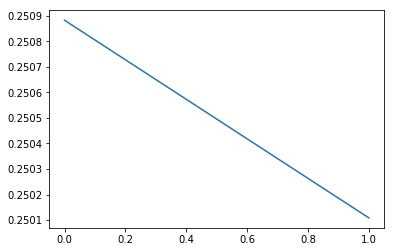

In [80]:
plt.plot(callback_history.history['mean_squared_error'])

In [93]:
y_pred = model.predict_proba(padded_texts_eval, batch_size=64)

In [94]:
roc_score = roc_auc_score(df_eval_manAug['category'], y_pred)
print('The ROC AUC score for the test set is: ', roc_score)

The ROC AUC score for the test set is:  0.5


In [41]:
# ------------------------ END of the Experiment ------------------------------------

## Implementing SMOTE with classical machine learning

## Without oversampling (Imbalanced data)

## Oversampling using SMOTE

In [148]:
import time



# Need to get the word2vec word vectors for the training and test instances
print('Generating the word-embeddings...')
start_time = time.time()
embeddings = get_word2vec_embeddings(pubmed_w2v_embedng, df_data)
X_train_word2vec, X_eval_word2vec, y_train_word2vec, y_eval_word2vec = train_test_split(embeddings, df_data['category'], test_size=0.2, random_state=40)
print('Generated the embeddings in --- %s seconds ---' % (time.time() - start_time))
print()

# RandomOverSampler
# Resample training set
X_train_ros, y_train_ros = ros.fit_resample(X_train_word2vec, y_train_word2vec)

# Resample evaluation set
X_eval_ros, y_eval_ros = ros.fit_resample(X_eval_word2vec, y_eval_word2vec)
print('Performed random oversampling of the minorita class...')
# -----------------------------------------------------------------------------------------------

# SMOTE
# Resample training set
X_train_smote, y_train_smote = smoteSampler.fit_resample(X_train_word2vec, y_train_word2vec)

# Resample evaluation set
X_eval_smote, y_eval_smote = smoteSampler.fit_resample(X_eval_word2vec, y_eval_word2vec)
print('Performed SMOTE oversampling of the minorita class...')
# -----------------------------------------------------------------------------------------------

# Borderline SMOTE
# Resample training set
X_train_br_smote, y_train_br_smote = border_smote.fit_resample(X_train_word2vec, y_train_word2vec)

# Resample evaluation set
X_eval_br_smote, y_eval_br_smote = border_smote.fit_resample(X_eval_word2vec, y_eval_word2vec)
print('Performed borderline-SMOTE oversampling of the minorita class...')
# -----------------------------------------------------------------------------------------------

# SVM SMOTE
# Resample training set
X_train_svm_smote, y_train_svm_smote = svm_smote.fit_resample(X_train_word2vec, y_train_word2vec)

# Resample evaluation set
X_eval_svm_smote, y_eval_svm_smote = svm_smote.fit_resample(X_eval_word2vec, y_eval_word2vec)
print('Performed SVM-SMOTE oversampling of the minorita class...')
# -----------------------------------------------------------------------------------------------

# Adasyn 
# Resample training set
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_word2vec, y_train_word2vec)

# Resample evaluation set
X_eval_adasyn, y_eval_adasyn = adasyn.fit_resample(X_eval_word2vec, y_eval_word2vec)
print('Performed ADASYN oversampling of the minorita class...')

/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).

/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



## Implement base classifier (LR)

/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



              precision    recall  f1-score   support

           0       0.95      0.87      0.91      4640
           1       0.88      0.95      0.91      4640

    accuracy                           0.91      9280
   macro avg       0.91      0.91      0.91      9280
weighted avg       0.91      0.91      0.91      9280



<module 'matplotlib.pyplot' from '/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/matplotlib/pyplot.py'>

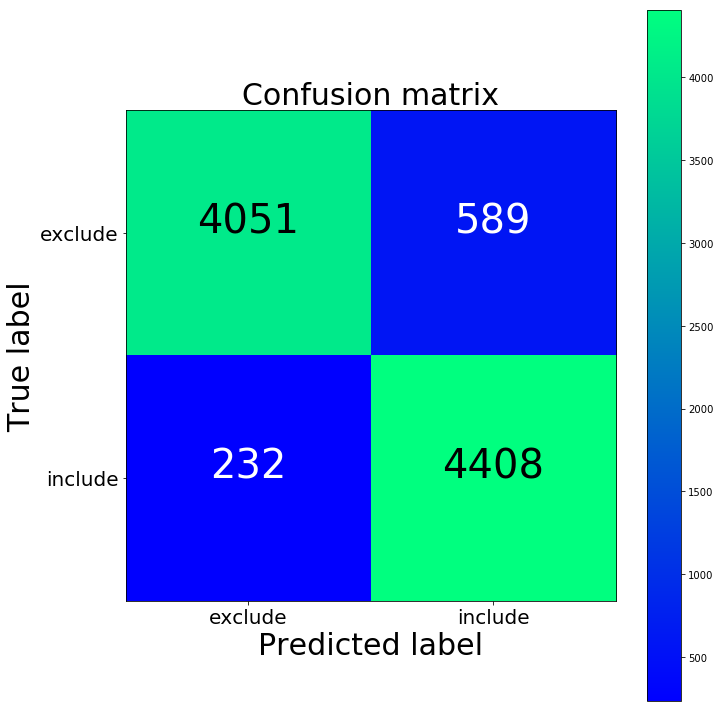

In [277]:
# Vectorizers
# tfidf_vectorizor = TfidfVectorizer()

# Classifier
log_reg_clf = LogisticRegression(intercept_scaling=1, class_weight='balanced', random_state=0)

# Feature scaler
normalizer = Normalizer()

log_reg_clf_w2v = Pipeline([('norm', normalizer), ('clf', log_reg_clf)])

log_reg_clf_w2v.fit(X_train_svm_smote, y_train_svm_smote)


df_eval_pred_logReg_w2v = log_reg_clf_w2v.predict(X_eval_svm_smote)

classReport_logReg_w2v =  classification_report(y_eval_svm_smote, df_eval_pred_logReg_w2v)
print(classReport_logReg_w2v)

conMat_logReg_w2v = confusion_matrix(y_eval_svm_smote, df_eval_pred_logReg_w2v)

fig = plt.figure(figsize=(10, 10))
plot_confusion_matrix(conMat_logReg_w2v, classes=['exclude','include'], title='Confusion matrix', normalize=False)

/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



              precision    recall  f1-score   support

           0       0.94      0.87      0.90      4640
           1       0.88      0.95      0.91      4640

    accuracy                           0.91      9280
   macro avg       0.91      0.91      0.91      9280
weighted avg       0.91      0.91      0.91      9280



<module 'matplotlib.pyplot' from '/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/matplotlib/pyplot.py'>

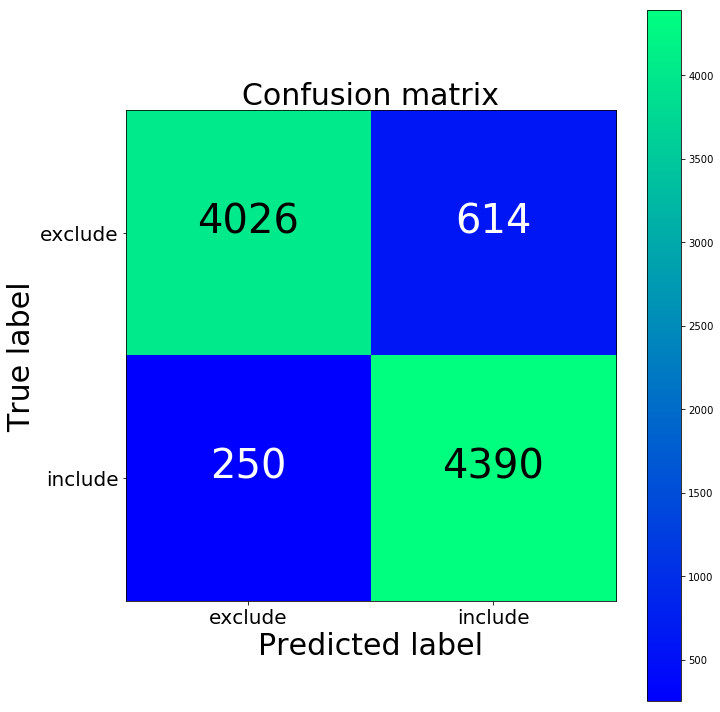

In [278]:
# Vectorizers
# tfidf_vectorizor = TfidfVectorizer()

# Classifier
log_reg_clf = LogisticRegression(intercept_scaling=1, class_weight='balanced', random_state=0)

# Feature scaler
normalizer = Normalizer()

log_reg_clf_w2v = Pipeline([('norm', normalizer), ('clf', log_reg_clf)])

log_reg_clf_w2v.fit(X_train_ros, y_train_ros)


df_eval_pred_logReg_w2v = log_reg_clf_w2v.predict(X_eval_ros)

classReport_logReg_w2v =  classification_report(y_eval_ros, df_eval_pred_logReg_w2v)
print(classReport_logReg_w2v)

conMat_logReg_w2v = confusion_matrix(y_eval_ros, df_eval_pred_logReg_w2v)

fig = plt.figure(figsize=(10, 10))
plot_confusion_matrix(conMat_logReg_w2v, classes=['exclude','include'], title='Confusion matrix', normalize=False)

/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



              precision    recall  f1-score   support

           0       0.99      0.86      0.92      4640
           1       0.41      0.95      0.57       468

    accuracy                           0.87      5108
   macro avg       0.70      0.91      0.75      5108
weighted avg       0.94      0.87      0.89      5108



<module 'matplotlib.pyplot' from '/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/matplotlib/pyplot.py'>

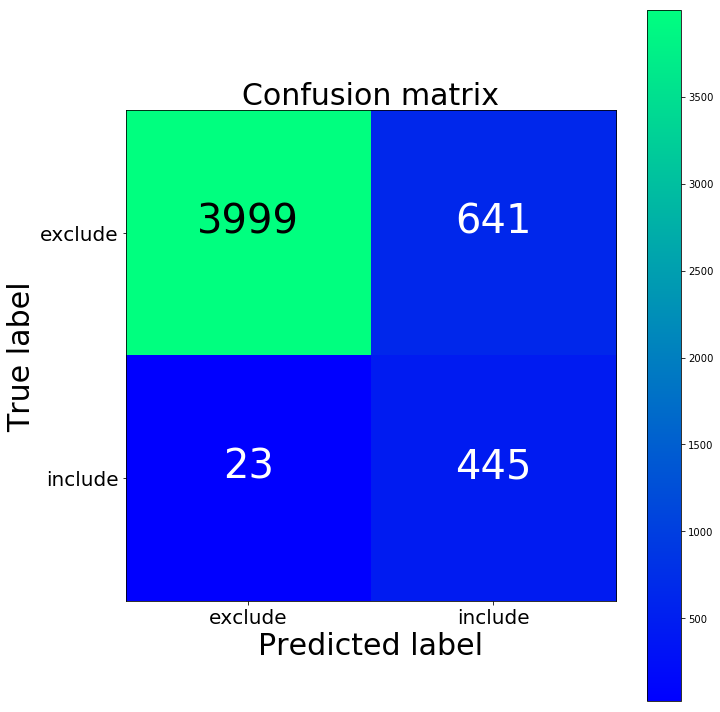

In [279]:
# Vectorizers
# tfidf_vectorizor = TfidfVectorizer()

# Classifier
log_reg_clf = LogisticRegression(intercept_scaling=1, class_weight='balanced', random_state=0)

# Feature scaler
normalizer = Normalizer()


log_reg_clf_w2v = Pipeline([('norm', normalizer), ('clf', log_reg_clf)])

log_reg_clf_w2v.fit(X_train_word2vec, y_train_word2vec)


df_eval_pred_logReg_w2v = log_reg_clf_w2v.predict(X_eval_word2vec)

classReport_logReg_w2v =  classification_report(y_eval_word2vec, df_eval_pred_logReg_w2v)
print(classReport_logReg_w2v)

conMat_logReg_w2v = confusion_matrix(y_eval_word2vec, df_eval_pred_logReg_w2v)

fig = plt.figure(figsize=(10, 10))
plot_confusion_matrix(conMat_logReg_w2v, classes=['exclude','include'], title='Confusion matrix', normalize=False)

/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



              precision    recall  f1-score   support

           0       0.96      0.89      0.92      4640
           1       0.89      0.96      0.93      4640

    accuracy                           0.92      9280
   macro avg       0.93      0.92      0.92      9280
weighted avg       0.93      0.92      0.92      9280



<module 'matplotlib.pyplot' from '/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/matplotlib/pyplot.py'>

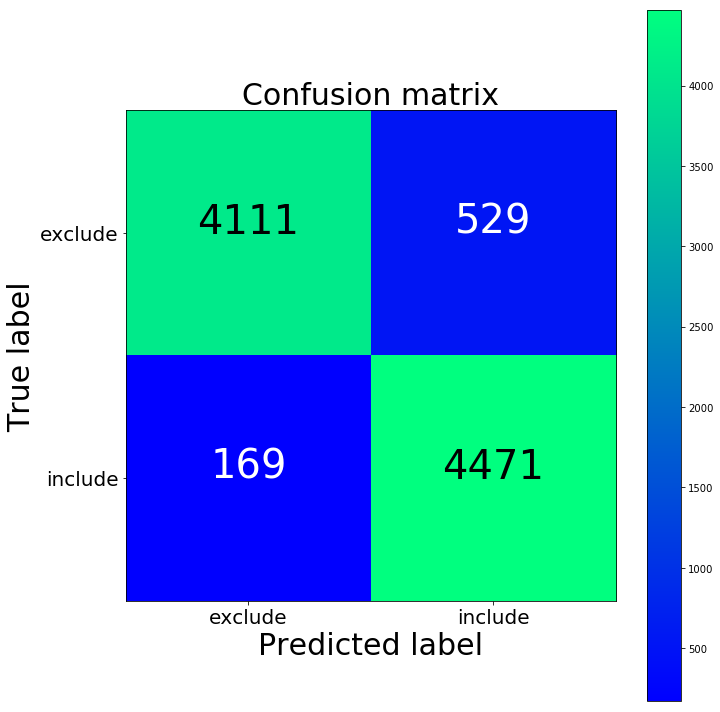

In [280]:
# Vectorizers
# tfidf_vectorizor = TfidfVectorizer()

# Classifier
log_reg_clf = LogisticRegression(intercept_scaling=1, class_weight='balanced', random_state=0)

# Feature scaler
normalizer = Normalizer()


log_reg_clf_w2v = Pipeline([('norm', normalizer), ('clf', log_reg_clf)])

log_reg_clf_w2v.fit(X_train_smote, y_train_smote)


df_eval_pred_logReg_w2v = log_reg_clf_w2v.predict(X_eval_smote)

classReport_logReg_w2v =  classification_report(y_eval_smote, df_eval_pred_logReg_w2v)
print(classReport_logReg_w2v)

conMat_logReg_w2v = confusion_matrix(y_eval_smote, df_eval_pred_logReg_w2v)

fig = plt.figure(figsize=(10, 10))
plot_confusion_matrix(conMat_logReg_w2v, classes=['exclude','include'], title='Confusion matrix', normalize=False)

/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



              precision    recall  f1-score   support

           0       0.96      0.88      0.92      4640
           1       0.89      0.96      0.93      4640

    accuracy                           0.92      9280
   macro avg       0.93      0.92      0.92      9280
weighted avg       0.93      0.92      0.92      9280



<module 'matplotlib.pyplot' from '/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/matplotlib/pyplot.py'>

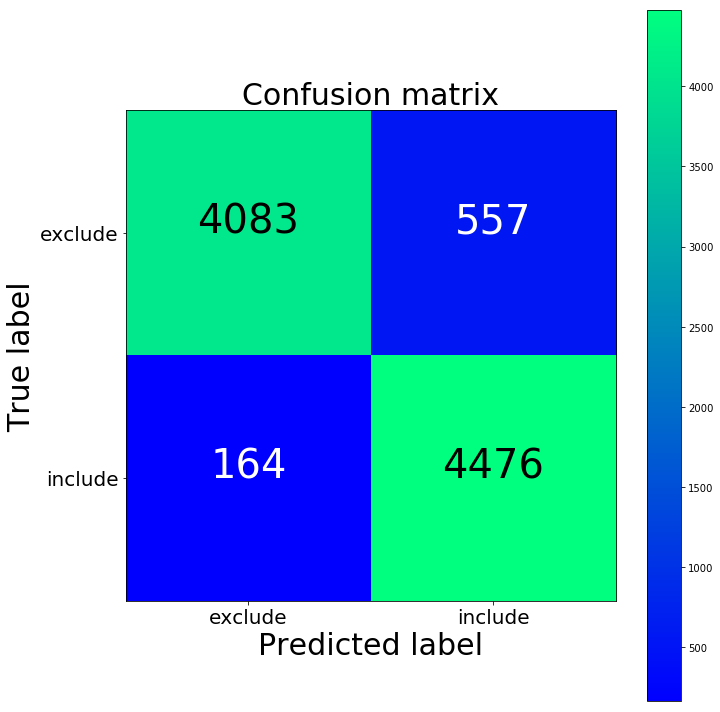

In [281]:
# Vectorizers
# tfidf_vectorizor = TfidfVectorizer()

# Classifier
log_reg_clf = LogisticRegression(intercept_scaling=1, class_weight='balanced', random_state=0)

# Feature scaler
normalizer = Normalizer()

# Param grid
param_grid = [{'clf__penalty': ['l1','l2']
              }
             ]

log_reg_clf_w2v = Pipeline([('norm', normalizer), ('clf', log_reg_clf)])

log_reg_clf_w2v.fit(X_train_br_smote, y_train_br_smote)


df_eval_pred_logReg_w2v = log_reg_clf_w2v.predict(X_eval_br_smote)

classReport_logReg_w2v =  classification_report(y_eval_br_smote, df_eval_pred_logReg_w2v)
print(classReport_logReg_w2v)

conMat_logReg_w2v = confusion_matrix(y_eval_br_smote, df_eval_pred_logReg_w2v)

fig = plt.figure(figsize=(10, 10))
plot_confusion_matrix(conMat_logReg_w2v, classes=['exclude','include'], title='Confusion matrix', normalize=False)

/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4640
           1       0.88      0.96      0.92      4614

    accuracy                           0.92      9254
   macro avg       0.92      0.92      0.92      9254
weighted avg       0.92      0.92      0.92      9254



<module 'matplotlib.pyplot' from '/home/anjani/anaconda3/envs/systreviewclassifi/lib/python3.6/site-packages/matplotlib/pyplot.py'>

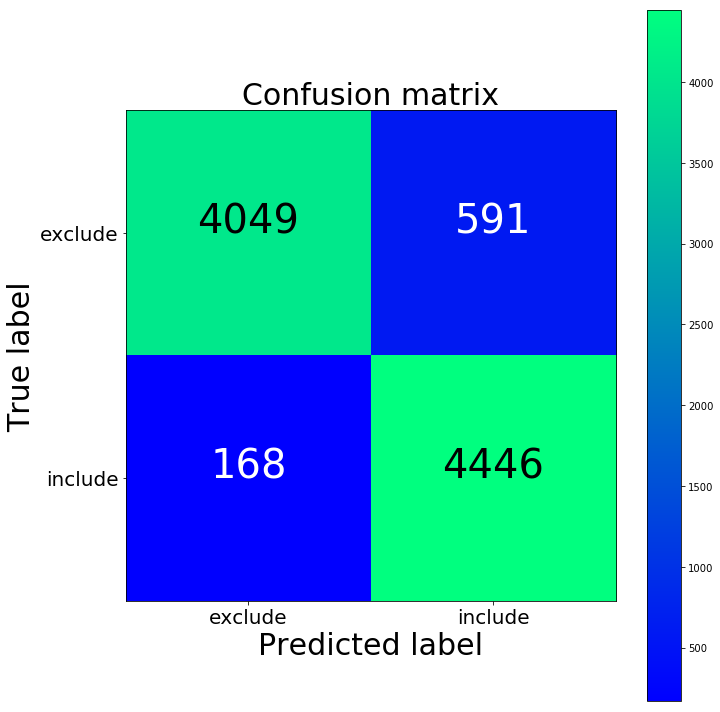

In [300]:


# Vectorizers
# tfidf_vectorizor = TfidfVectorizer()

# Classifier
log_reg_clf = LogisticRegression(intercept_scaling=1, class_weight= 'balanced', random_state=0)

# Feature scaler
normalizer = Normalizer()


log_reg_clf_w2v = Pipeline([('norm', normalizer), ('clf', log_reg_clf)])

log_reg_clf_w2v.fit(X_train_adasyn, y_train_adasyn)


df_eval_pred_logReg_w2v = log_reg_clf_w2v.predict(X_eval_adasyn)

classReport_logReg_w2v =  classification_report(y_eval_adasyn, df_eval_pred_logReg_w2v)
print(classReport_logReg_w2v)

conMat_logReg_w2v = confusion_matrix(y_eval_adasyn, df_eval_pred_logReg_w2v)

fig = plt.figure(figsize=(10, 10))
plot_confusion_matrix(conMat_logReg_w2v, classes=['exclude','include'], title='Confusion matrix', normalize=False)

# Linear SVC